In [4]:
#[](https://mathinfo.unistra.fr/)


#![](https://economie.edu.umontpellier.fr/files/2018/9/economie.png)

# Projet sur la prédiction du cancer du sein

# Mamadou Diop 

## Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
#warnings
import warnings
warnings.simplefilter(action='ignore')

## Importation des données

In [2]:
base = pd.read_csv('breast-cancer.csv')
base.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = base.copy() # Permet de copier base

In [4]:
#dimension de la base
df.shape

(569, 32)

In [7]:
# listes des colonnes
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Data Preprocessing

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [17]:
df.duplicated().sum() # il n'y a pas de doublons dans la base 

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
# les valeurs uniques de la base pour chaque variable
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [20]:
df.isnull().sum() # chercher les valeurs manquantes de la base

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# on transforme les B  et M par des 0 et 1 

In [4]:
#0 pour les B et 1 pour M
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

## Analyse Exploratoire des Données

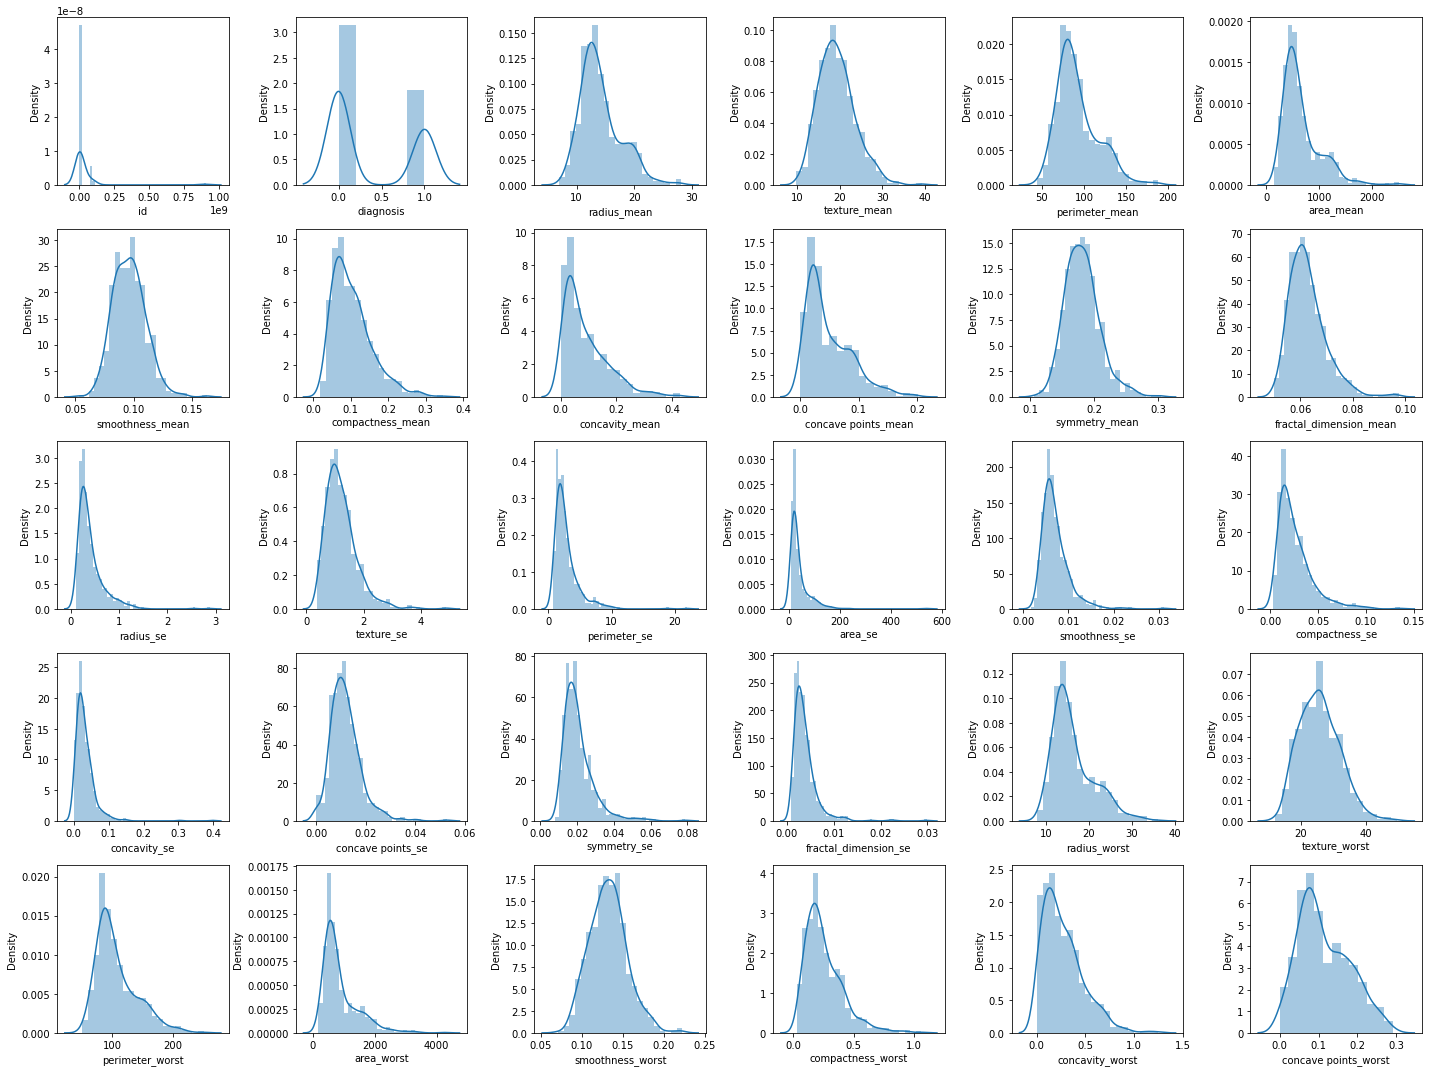

In [34]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Graphique de la variable diagnosis')

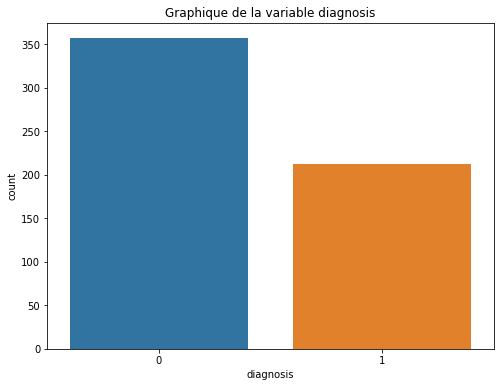

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(df['diagnosis'])
plt.title('Graphique de la variable diagnosis')

0    357
1    212
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

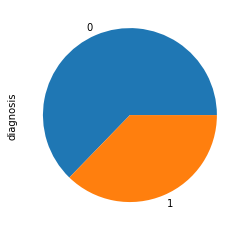

In [40]:
print(df["diagnosis"].value_counts())
df["diagnosis"].value_counts().plot(kind="pie")

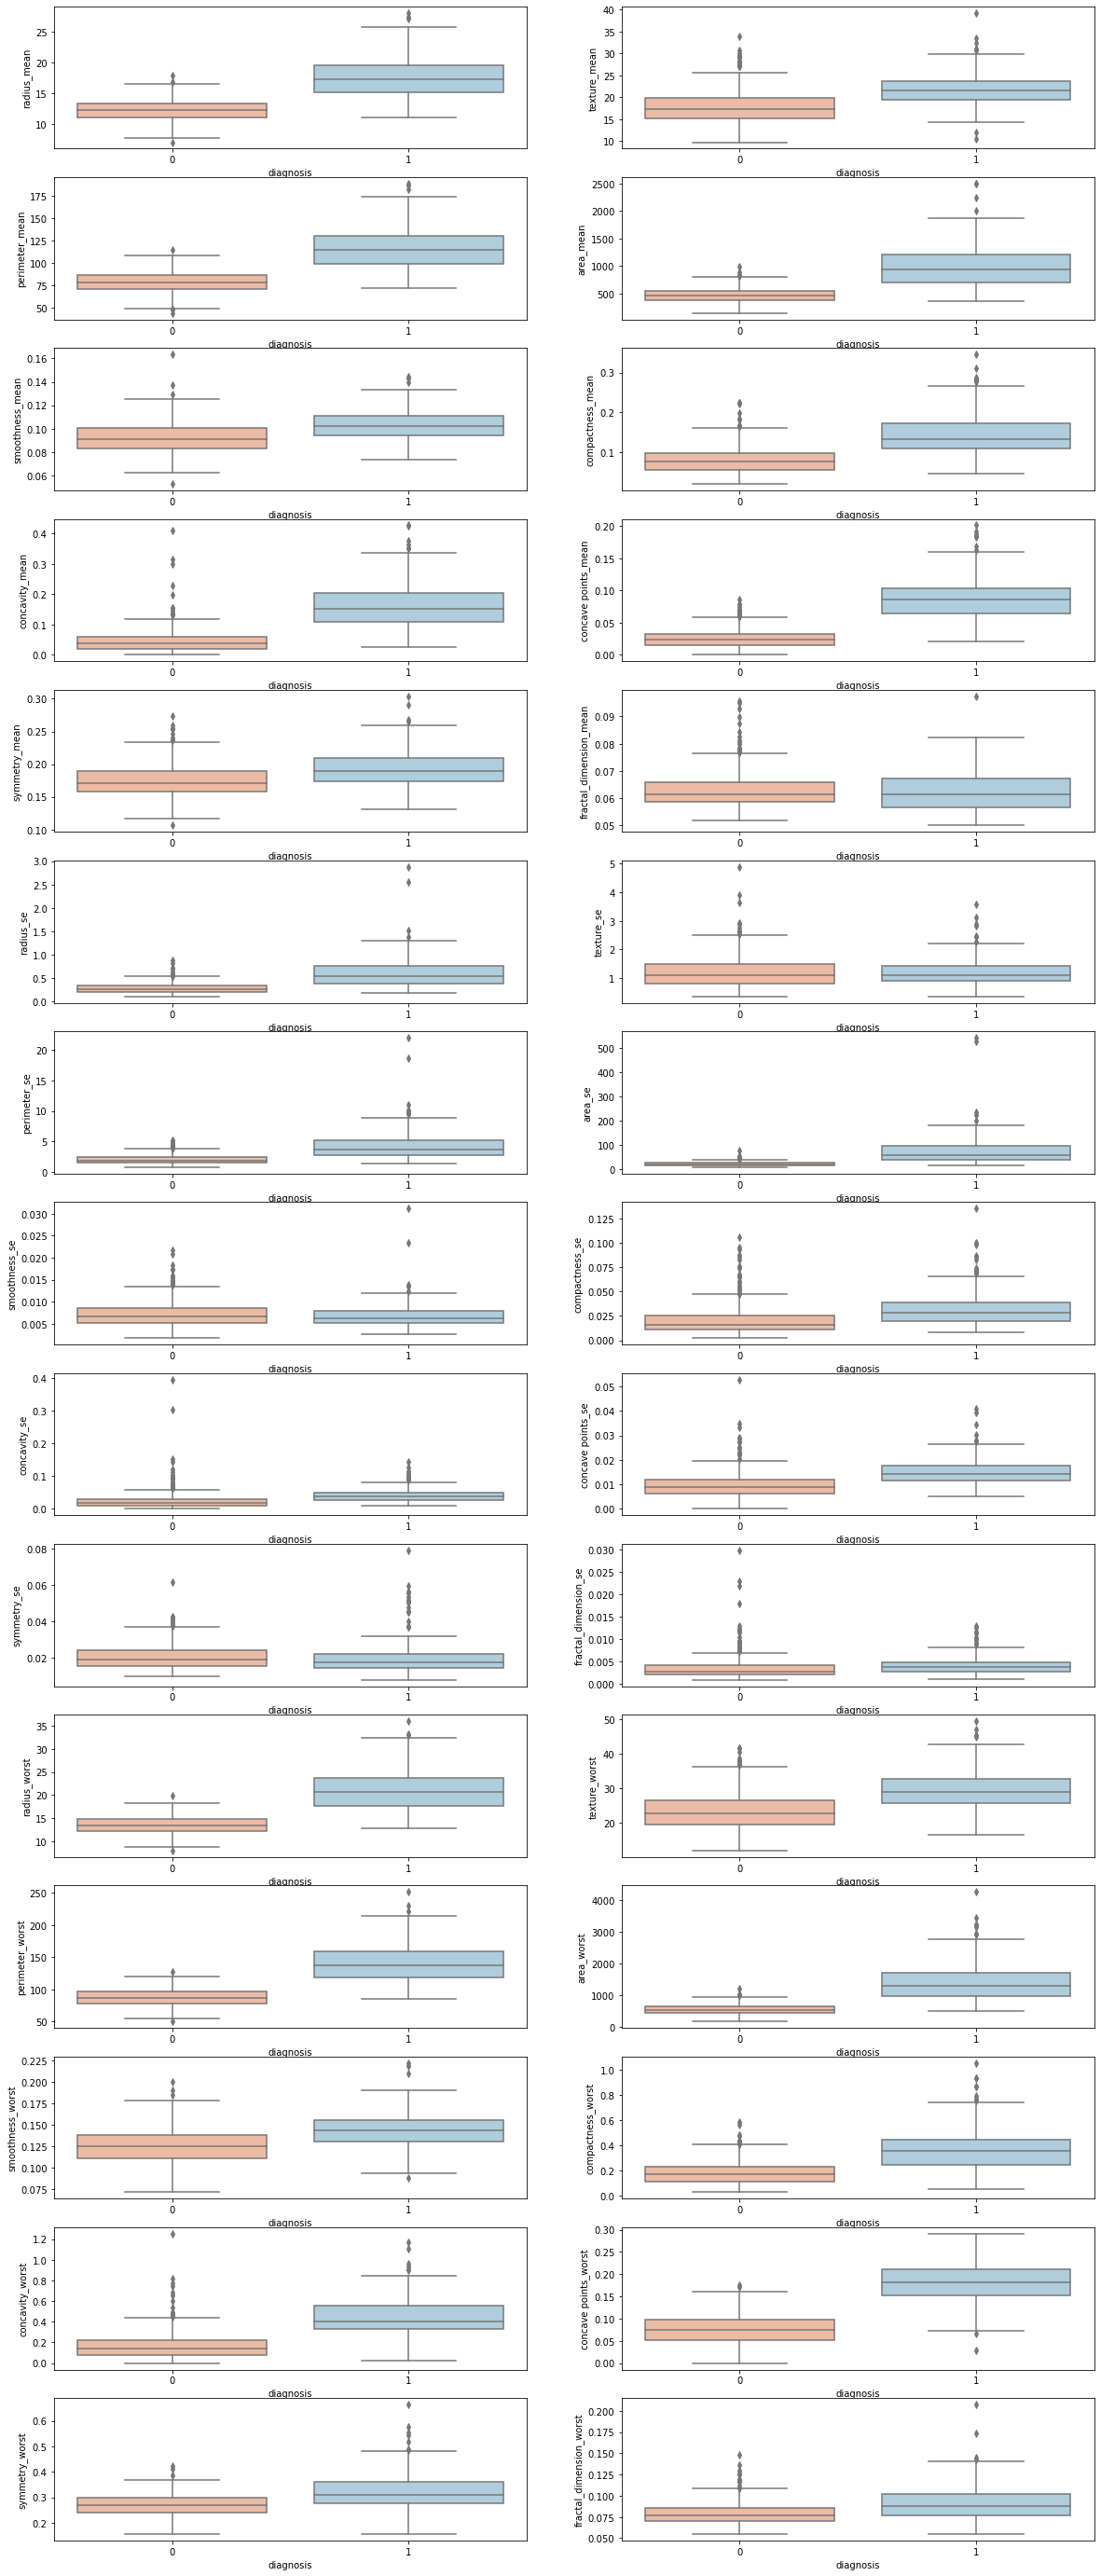

In [41]:
# checking numerical data count
nume_cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
           'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['diagnosis'], palette = "RdBu")

In [43]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<AxesSubplot:>

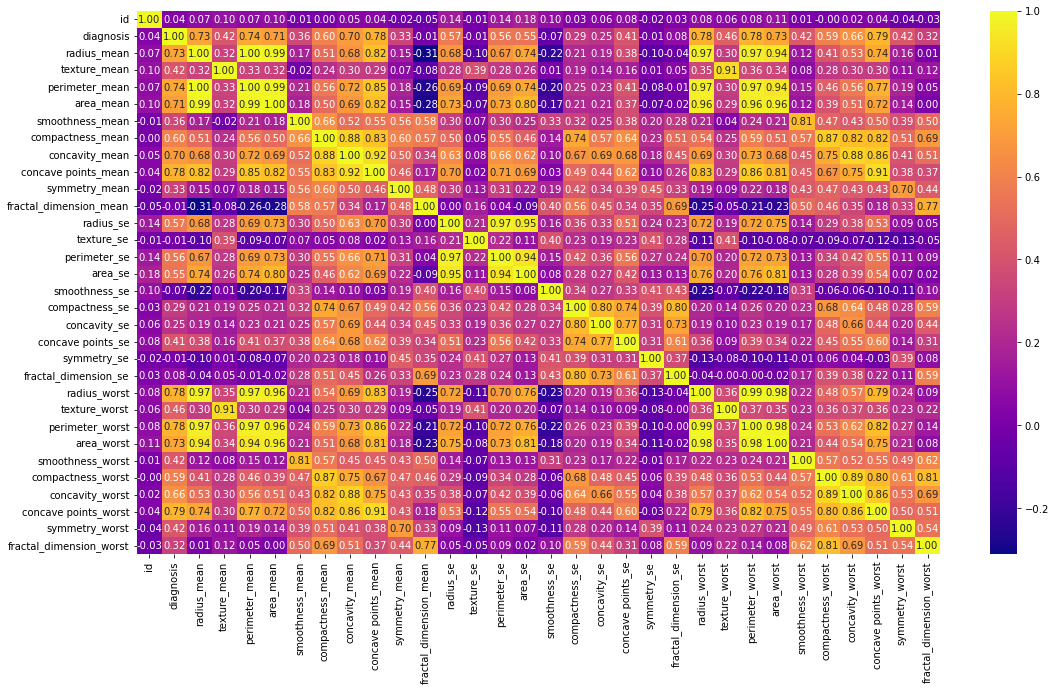

In [42]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

In [31]:
col = ['diagnosis','concave points_worst','perimeter_worst','concave points_mean','radius_worst',
       'perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst' ]            

In [32]:
dff = df[col]

In [33]:
dff.shape

(569, 11)

## Construction de modéle

In [34]:
# independant variables
x=dff.drop(["diagnosis"],axis=1)

y = dff["diagnosis"].values.reshape(-1,1)  #target

In [35]:
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 10) 
shape of y : (569, 1)


In [36]:
def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  

#### Model Support Vector Machine(SVM)

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (512, 10)
shape of y_train : (512, 1)
shape of x_test : (57, 10)
shape of y_test : (57, 1)


In [38]:
# Crée le modèle SVM 
svm=SVC(kernel='linear',random_state = 1) 

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)


In [40]:
Report(y_test , y_pred)

Accuracy : 94.73684210526315% 

Confusion Matrix : 

[[33  2]
 [ 1 21]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.91      0.95      0.93        22

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [41]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9449275362318841


In [24]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.951
Precision :  0.951
Recall    :  0.951
f1        :  0.951

Test
Accuracy  :  0.947
Precision :  0.947
Recall    :  0.947
f1        :  0.947


#### GridSearchCV

In [12]:
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [13]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5, param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9492099752522369
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


45
45


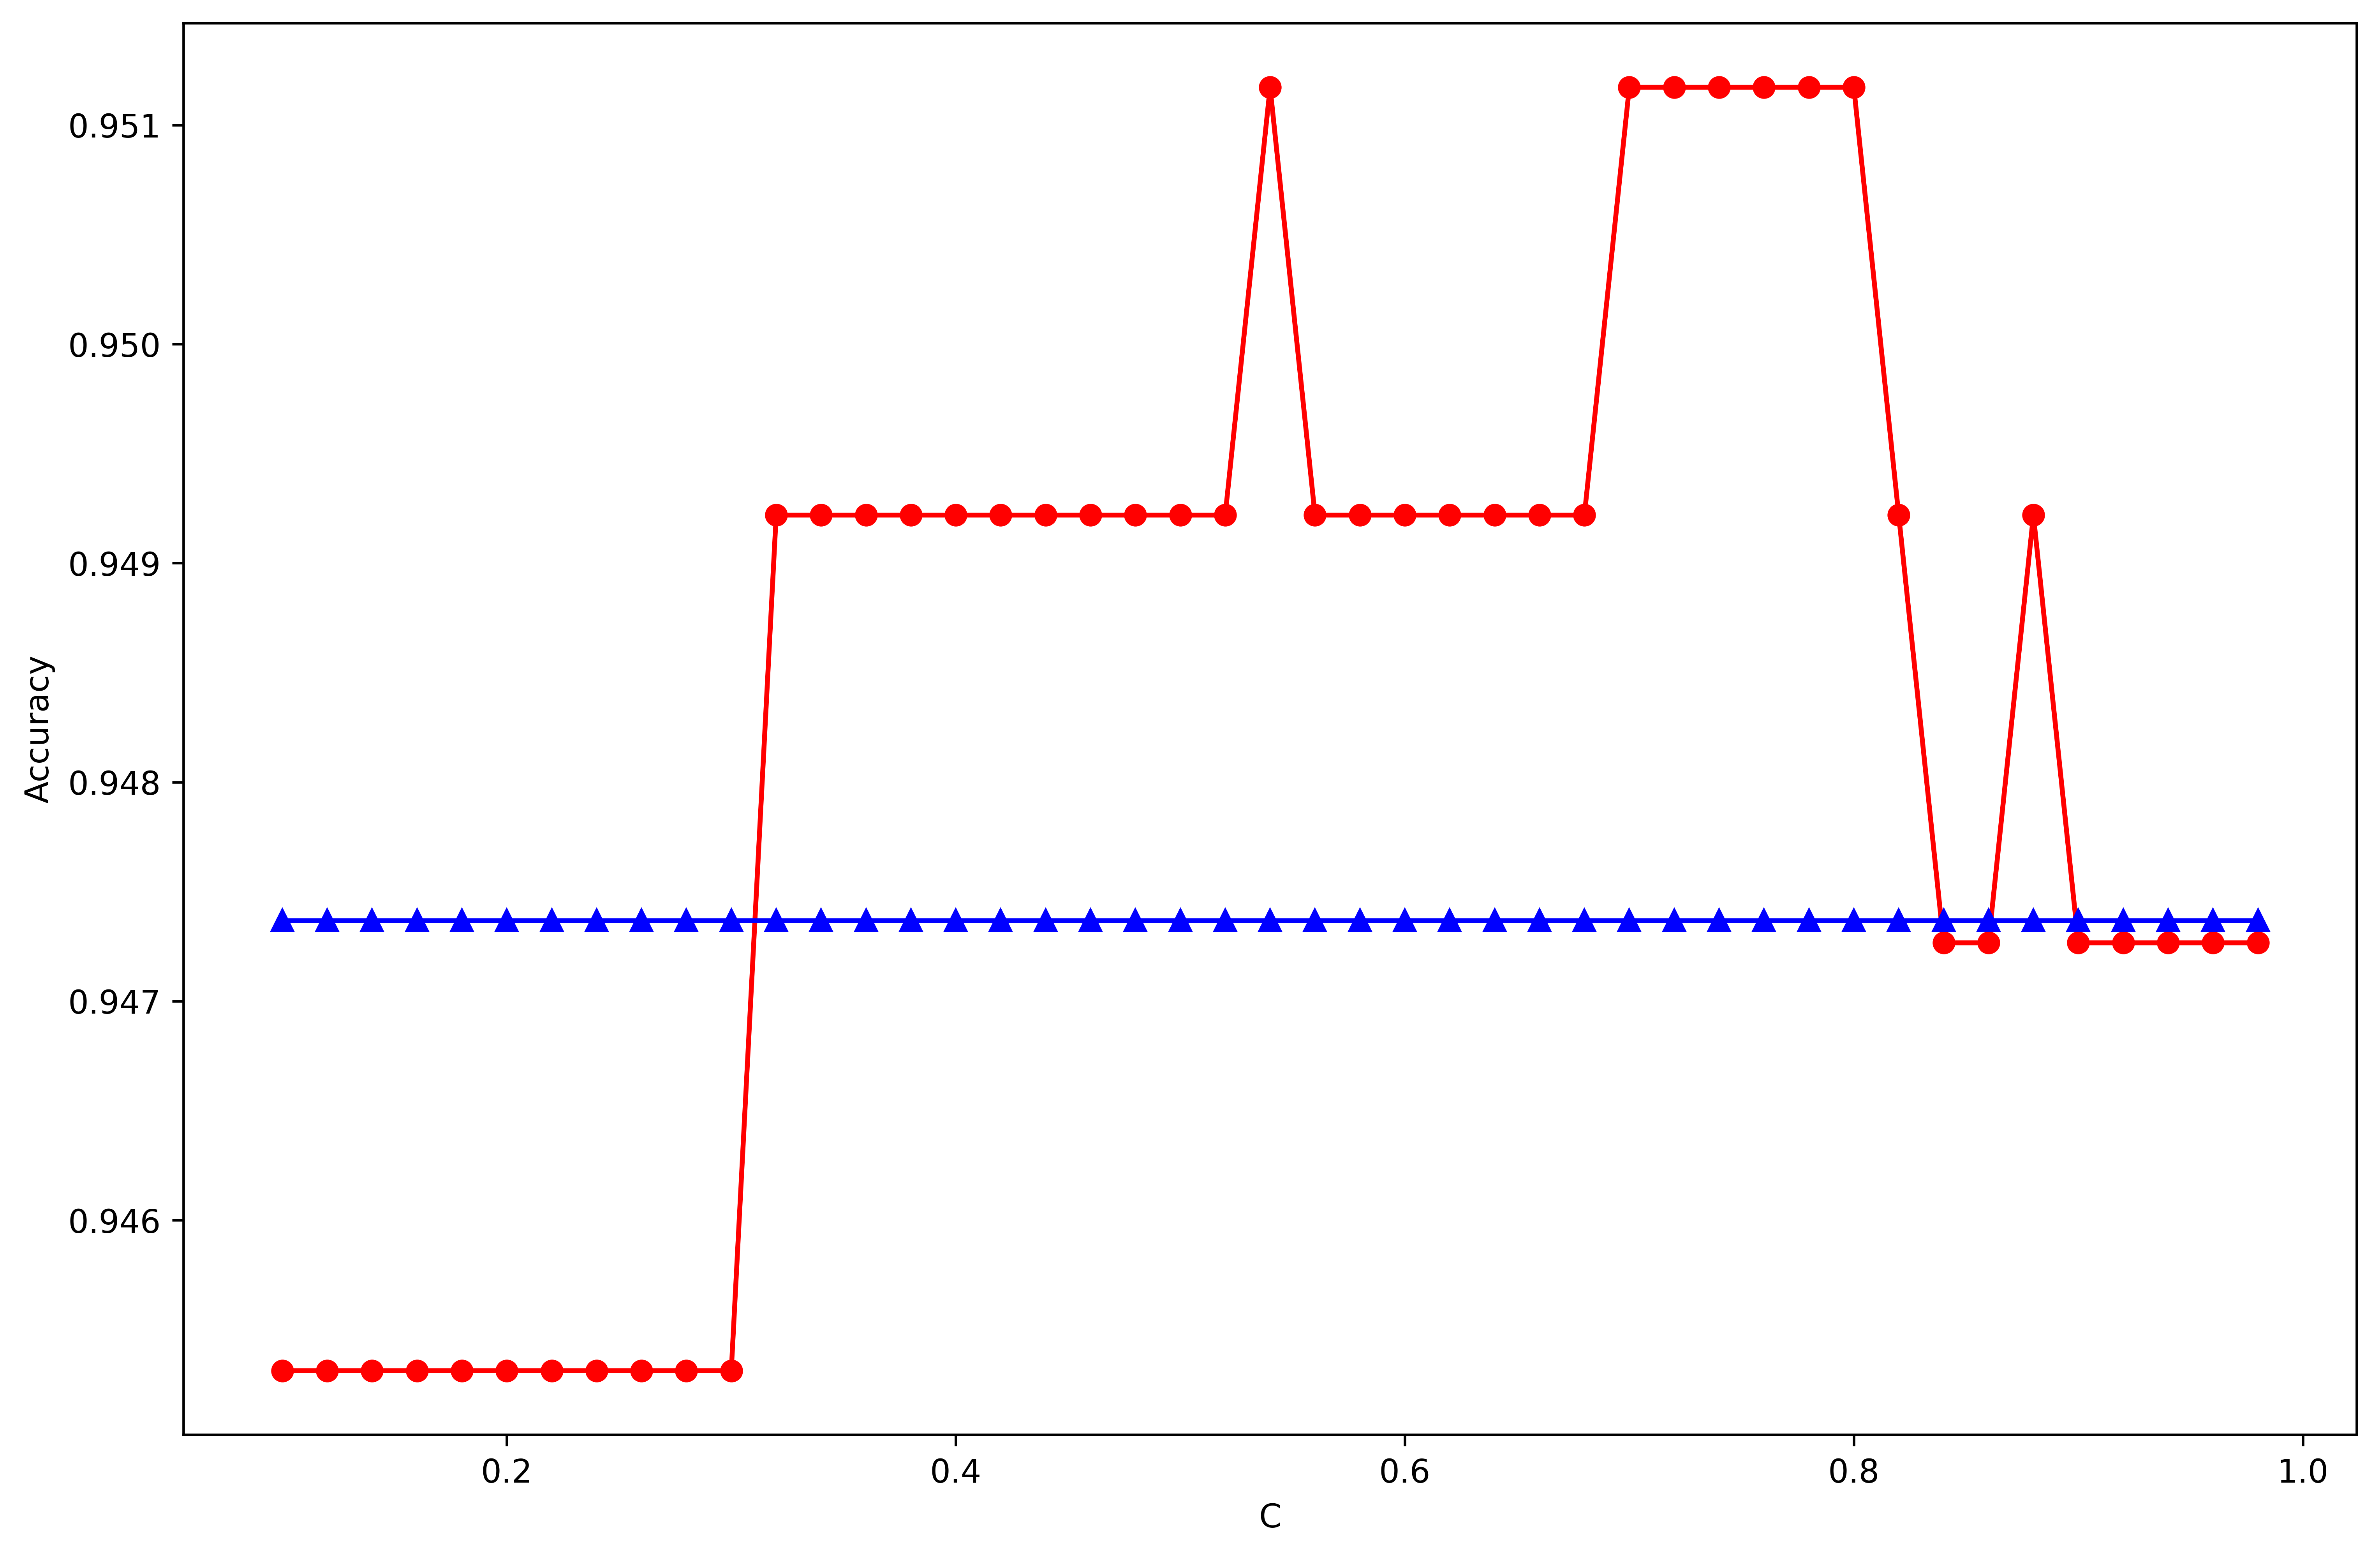

In [14]:
train_score, test_score = [], []
x = dff.drop('diagnosis', axis=1)
y = dff['diagnosis'].values.reshape(-1, 1) #Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 1)

for i in np.arange(0.1,1,0.02):
    svm = SVC(random_state = 1, kernel = 'linear', decision_function_shape = 'ovo', C = i)
    svm.fit(x_train, y_train)
    train_score.append(svm.score(x_train, y_train))
    test_score.append(svm.score(x_test, y_test))

print(len(train_score))
print(len(test_score))

plt.figure(figsize = (12, 8), dpi = 600)
plt.plot(np.arange(0.1, 1, 0.02), train_score, marker = 'o', color = 'red', label = 'Train')
plt.plot(np.arange(0.1, 1, 0.02), test_score, marker = '^', color = 'blue', label = 'Test')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [15]:
svm1=SVC(C=0.5,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

In [16]:
Report(y_test , y_pred)

Accuracy : 94.73684210526315% 

Confusion Matrix : 

[[33  1]
 [ 2 21]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.95      0.91      0.93        23

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



In [17]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9449275362318841


In [18]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.947
Precision :  0.947
Recall    :  0.947
f1        :  0.947

Test
Accuracy  :  0.947
Precision :  0.947
Recall    :  0.947
f1        :  0.947


In [19]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm1, classes=[0,1])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

ModuleNotFoundError: No module named 'yellowbrick'

#### K-Nearest Neighbour

In [20]:
x=dff.drop(["diagnosis"],axis=1)
y = dff["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 8) 
shape of y : (569, 1)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
k=20   #1 to 20
Acc=np.zeros((k))
for i in range (1, k+1):
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train.ravel())
    y_pred=KNN.predict (x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.92307692, 0.93706294, 0.92307692, 0.93006993, 0.93006993,
       0.93006993, 0.94405594, 0.95104895, 0.95104895, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196])

In [23]:
print(np.max(Acc))
print(np.min(Acc))

0.958041958041958
0.9230769230769231


#### MODELE AVEC GRIDSEARCHCV

In [24]:
parametrs={'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator=KNN ,  #model
                       param_grid=parametrs, #range k
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
k=6
KNN= KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train.ravel())
y_pred=KNN.predict (x_test)

#### Evaluation 

In [27]:
Report(y_test , y_pred)

Accuracy : 93.85964912280701% 

Confusion Matrix : 

[[64  3]
 [ 4 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [28]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9364396654719236


In [29]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.949
Precision :  0.949
Recall    :  0.949
f1        :  0.949

Test
Accuracy  :  0.939
Precision :  0.939
Recall    :  0.939
f1        :  0.939


In [30]:
cm = ConfusionMatrix(
    KNN, classes=[0,1])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

NameError: name 'ConfusionMatrix' is not defined

Nous avons utilisé les algorithmes SVM et KNN pour prédire si une instance de tumeur mammaire est bénigne ou maligne. Au cours du processus, nous avons créé des modèles avec des paramètres par défaut, puis nous avons utilisé des techniques pour les optimiser.
En raison de la nature médicale de l'ensemble de données, nous avons insisté sur l'importance d'avoir une précision élevée mais aussi des prédictions faussement négatives (FN) faibles, car cela permettrait de sauver des vies. Nous concluons que le modèle SVM est le modèle de classification optimal pour l'ensemble de données sur le cancer du sein au Wisconsin (du moins parmi les modèles considérés dans ce cahier), avec une précision moyenne de 0,94, une précision maligne de 0,94 et seulement 2 prédiction FN.